Data Sources

https://daacdata.apps.nsidc.org/pub/DATASETS/nsidc0192_seaice_trends_climo_v3/total-ice-area-extent/bootstrap/gsfc.bootstrap.month.extent.1978-2017.n

https://daacdata.apps.nsidc.org/pub/DATASETS/nsidc0192_seaice_trends_climo_v3/total-ice-area-extent/bootstrap/gsfc.bootstrap.month.extent.1978-2017.s


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir('')

In [3]:
arctic = pd.read_csv("Arctic_Sea_Ice.txt")
antarctic = pd.read_csv("Antarctic_Sea_Ice.txt")

Note, the data was interogated and date for 1987 December and 1988 January is missing from both dataframes

In [4]:
SeaIce = pd.DataFrame({"Year":arctic["Year"], "Month":arctic["Mon"], "Arctic":arctic["TotalArc"], "Antarctic":antarctic["TotalAnt"]})
SeaIce = SeaIce.iloc[2:, :]
count = np.arange(1, 467)
SeaIce["Count"] = count
SeaIce["Day"] = 1
SeaIce = SeaIce[["Count", "Year", "Month", "Day", "Arctic", "Antarctic"]]
SeaIce.head()

,Count,Year,Month,Day,Arctic,Antarctic
2,1,1979,1,1,15910365,6069264
3,2,1979,2,1,16631281,3366553
4,3,1979,3,1,16887642,4686168
5,4,1979,4,1,15946571,8418357
6,5,1979,5,1,14302966,11644575


In [21]:
SeaIce["Date"] = pd.to_datetime(SeaIce[['Year','Month', "Day"]])
SeaIce.head(4)

,Count,Year,Month,Day,Arctic,Antarctic,Date
2,1,1979,1,1,15910365,6069264,1979-01-01
3,2,1979,2,1,16631281,3366553,1979-02-01
4,3,1979,3,1,16887642,4686168,1979-03-01
5,4,1979,4,1,15946571,8418357,1979-04-01


Creating the x array for the pyplot plot as data missing

In [6]:
x1 = np.arange("1979-01-01", "1987-12-01", np.timedelta64(1, 'M'), dtype='datetime64[M]')
x2 = np.arange("1988-02-01", "2018-01-01", np.timedelta64(1, 'M'), dtype='datetime64[M]')
x3 = np.concatenate((x1,x2))

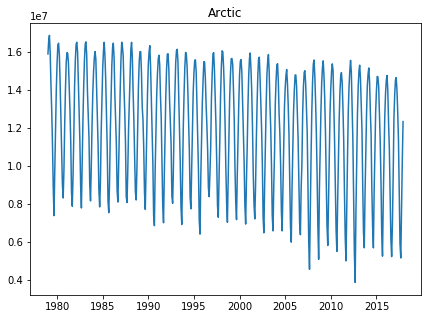

In [7]:
plt.figure(figsize=(7,5))
plt.plot(x3, SeaIce.Arctic, "-")
plt.title('Arctic')
plt.show()

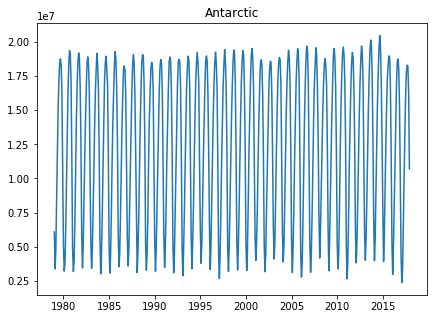

In [8]:
plt.figure(figsize=(7,5))
plt.plot(x3, SeaIce.Antarctic, "-")
plt.title('Antarctic')
plt.show()

Finding months with max ice extent

In [10]:
yearrange = np.arange(1979, 2018)
Arctic_MinByYear = []
Arctic_MaxByYear = []

for i in yearrange:
    MAX = SeaIce["Arctic"].where(SeaIce["Year"]==i).dropna().max()
    MIN = SeaIce["Arctic"].where(SeaIce["Year"]==i).dropna().min()
    
    Arctic_MaxByYear.append(MAX)
    Arctic_MinByYear.append(MIN)
    
ArcticMinMax = pd.DataFrame({"Year":yearrange, "Min":Arctic_MinByYear, "Max":Arctic_MaxByYear})
ArcticMinMax.head()

yearrange = np.arange(1979, 2018)
Antarctic_MinByYear = []
Antarctic_MaxByYear = []

for i in yearrange:
    MAX = SeaIce["Antarctic"].where(SeaIce["Year"]==i).dropna().max()
    MIN = SeaIce["Antarctic"].where(SeaIce["Year"]==i).dropna().min()
    
    Antarctic_MaxByYear.append(MAX)
    Antarctic_MinByYear.append(MIN)
    
AntarcticMinMax = pd.DataFrame({"Year":yearrange, "Min":Antarctic_MinByYear, "Max":Antarctic_MaxByYear})
AntarcticMinMax.head()

,Year,Min,Max
0,1979,3366553.0,18770298.0
1,1980,3205989.0,19371298.0
2,1981,3176244.0,19205334.0
3,1982,3443015.0,18909866.0
4,1983,3414321.0,19170606.0


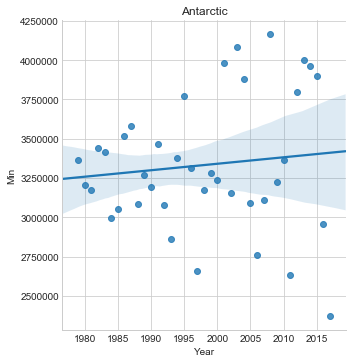

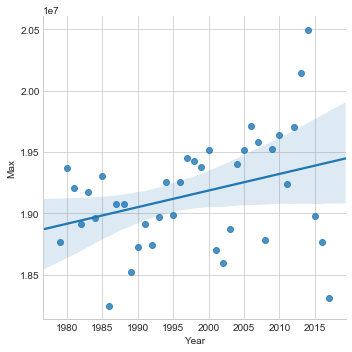

In [16]:
#Exploring min and max
sns.lmplot(x = "Year", y = "Min", data = AntarcticMinMax)
plt.title('Antarctic')
sns.lmplot(x = "Year", y = "Max", data = AntarcticMinMax)
plt.show()

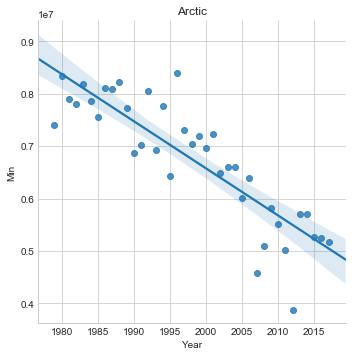

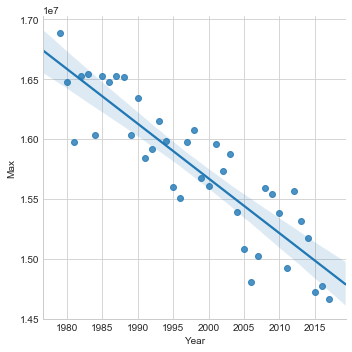

In [17]:
sns.lmplot(x = "Year", y = "Min", data = ArcticMinMax)
plt.title('Arctic')
sns.lmplot(x = "Year", y = "Max", data = ArcticMinMax)
plt.show()

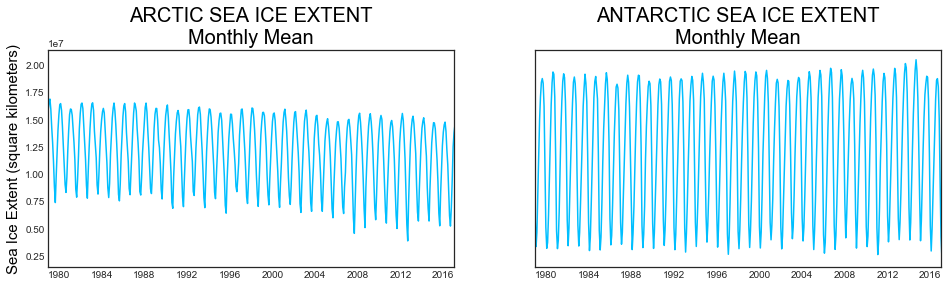

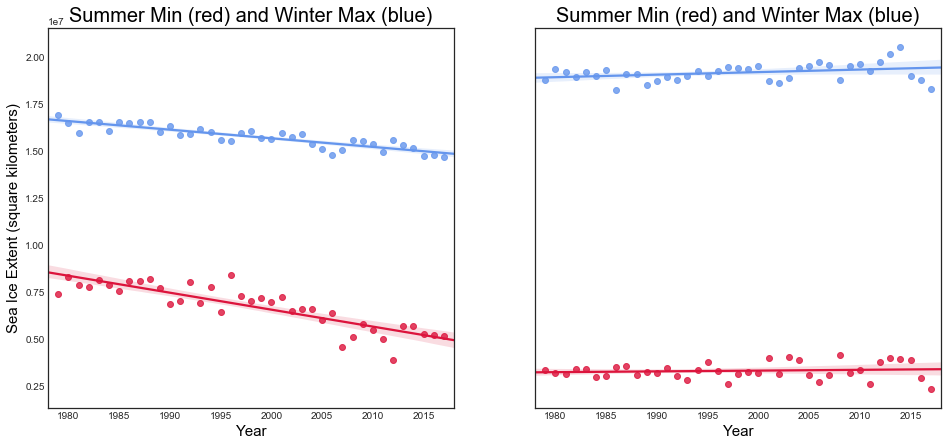

<Figure size 432x288 with 0 Axes>

In [19]:
#FINAL PLOT

plt.style.use('seaborn-white')

f, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, squeeze=False, subplot_kw=None, gridspec_kw=None, figsize = (16,4))
ax[0,0].plot(x3, SeaIce.Arctic, "-", label = "Arctic", c = "deepskyblue")
ax[0,1].plot(x3, SeaIce.Antarctic, "-", label = "Antarctic", c = "deepskyblue")
ax[0,0].set_xlim("1979-01-01", "2017-01-01")
ax[0,1].set_xlim("1979-01-01", "2017-01-01")
ax[0,0].set_ylabel("Sea Ice Extent (square kilometers)", fontsize=15, color="black")

f, axis = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, squeeze=False, subplot_kw=None, gridspec_kw=None, figsize = (16,7))
sns.regplot(x = "Year", y = "Min", data = ArcticMinMax, ax = axis[0,0], color = "crimson")  # draw a grid of plots
sns.regplot(x = "Year", y = "Max", data = ArcticMinMax, ax = axis[0,0], color = "cornflowerblue")

sns.regplot(x = "Year", y = "Min", data = AntarcticMinMax, ax = axis[0,1], color = "crimson")
sns.regplot(x = "Year", y = "Max", data = AntarcticMinMax, ax = axis[0,1], color = "cornflowerblue")

axis[0,0].set_xlim(1978, 2018)
axis[0,1].set_xlim(1978, 2018)
axis[0,0].set_ylabel("Sea Ice Extent (square kilometers)", fontsize=15, color="black")
axis[0,1].set_ylabel("")
axis[0,0].set_xlabel("Year", fontsize=15, color="black")
axis[0,1].set_xlabel("Year", fontsize=15, color="black")

ax[0,0].set_title("ARCTIC SEA ICE EXTENT\nMonthly Mean", fontsize=20, color="black")
ax[0,1].set_title("ANTARCTIC SEA ICE EXTENT\nMonthly Mean", fontsize=20, color="black")
axis[0,0].set_title("Summer Min (red) and Winter Max (blue)", fontsize=20, color="black")
axis[0,1].set_title("Summer Min (red) and Winter Max (blue)", fontsize=20, color="black")

plt.show()
plt.savefig("Sea Ice Extent.png")